<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Name> Dallin Seyfried
    <Class> 002 
    <Date> 12/1

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb
from scipy.stats import linregress

In [2]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report (print) the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

In [ ]:
A = np.load("anscombe.npy")



### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.special.comb()`.)

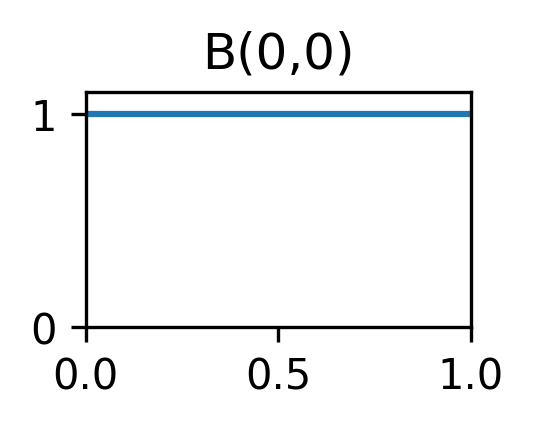

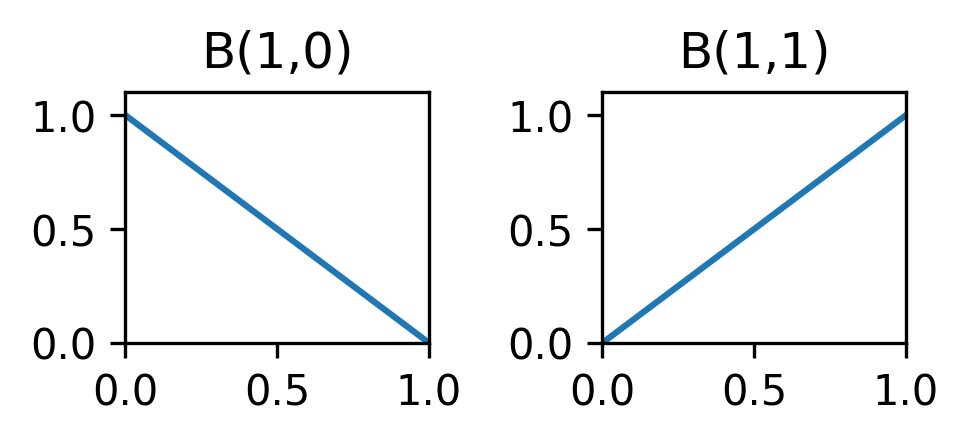

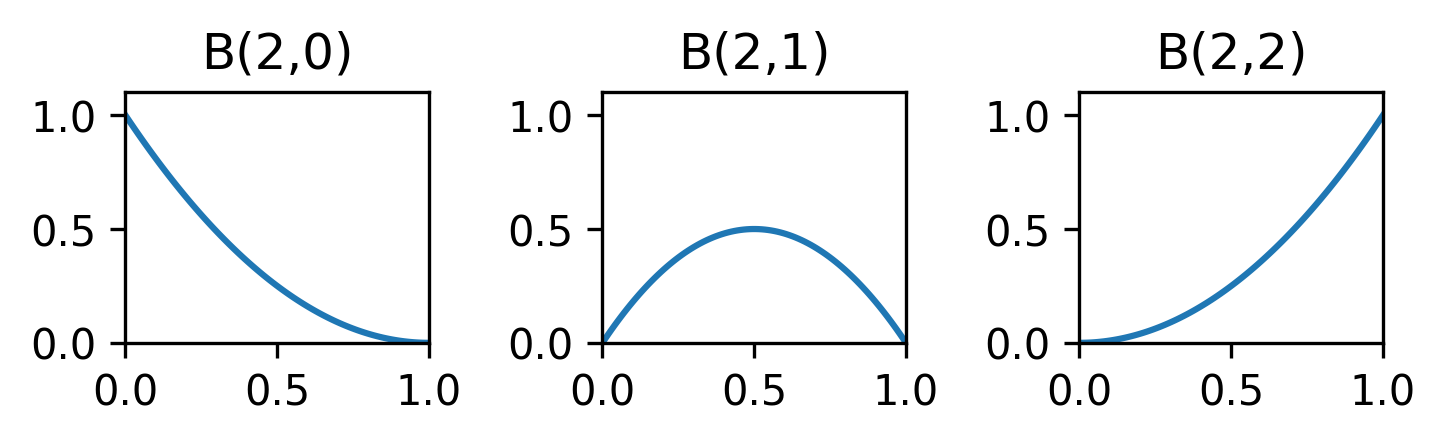

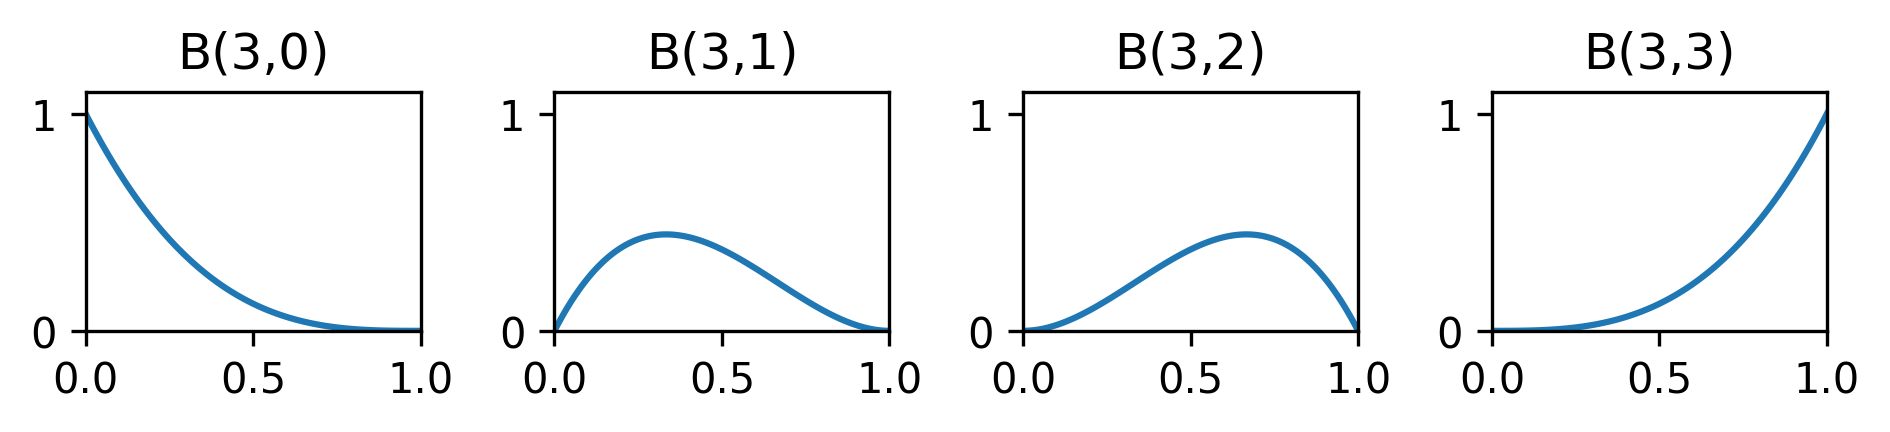

In [16]:
x = np.linspace(0, 1, 100)

for n in range(4):
    for v in range(n + 1):
        # Calculate the bernstein basis polynomial based on n and v
        n_choose_v = comb(n, v, exact=True)
        bernstein_n_v = n_choose_v * (x**v) * (1 - x)**(n-v)

        # Plot each graph in a subplot according to row and column
        plt.subplot(4, 4, 4 * n + v + 1)
        plt.plot(x, bernstein_n_v)
        plt.title("B(" + str(n) + "," + str(v) + ")")
        plt.ylim(0, 1.1)
        plt.xlim(0, 1)
        plt.tight_layout()
    plt.show()


### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

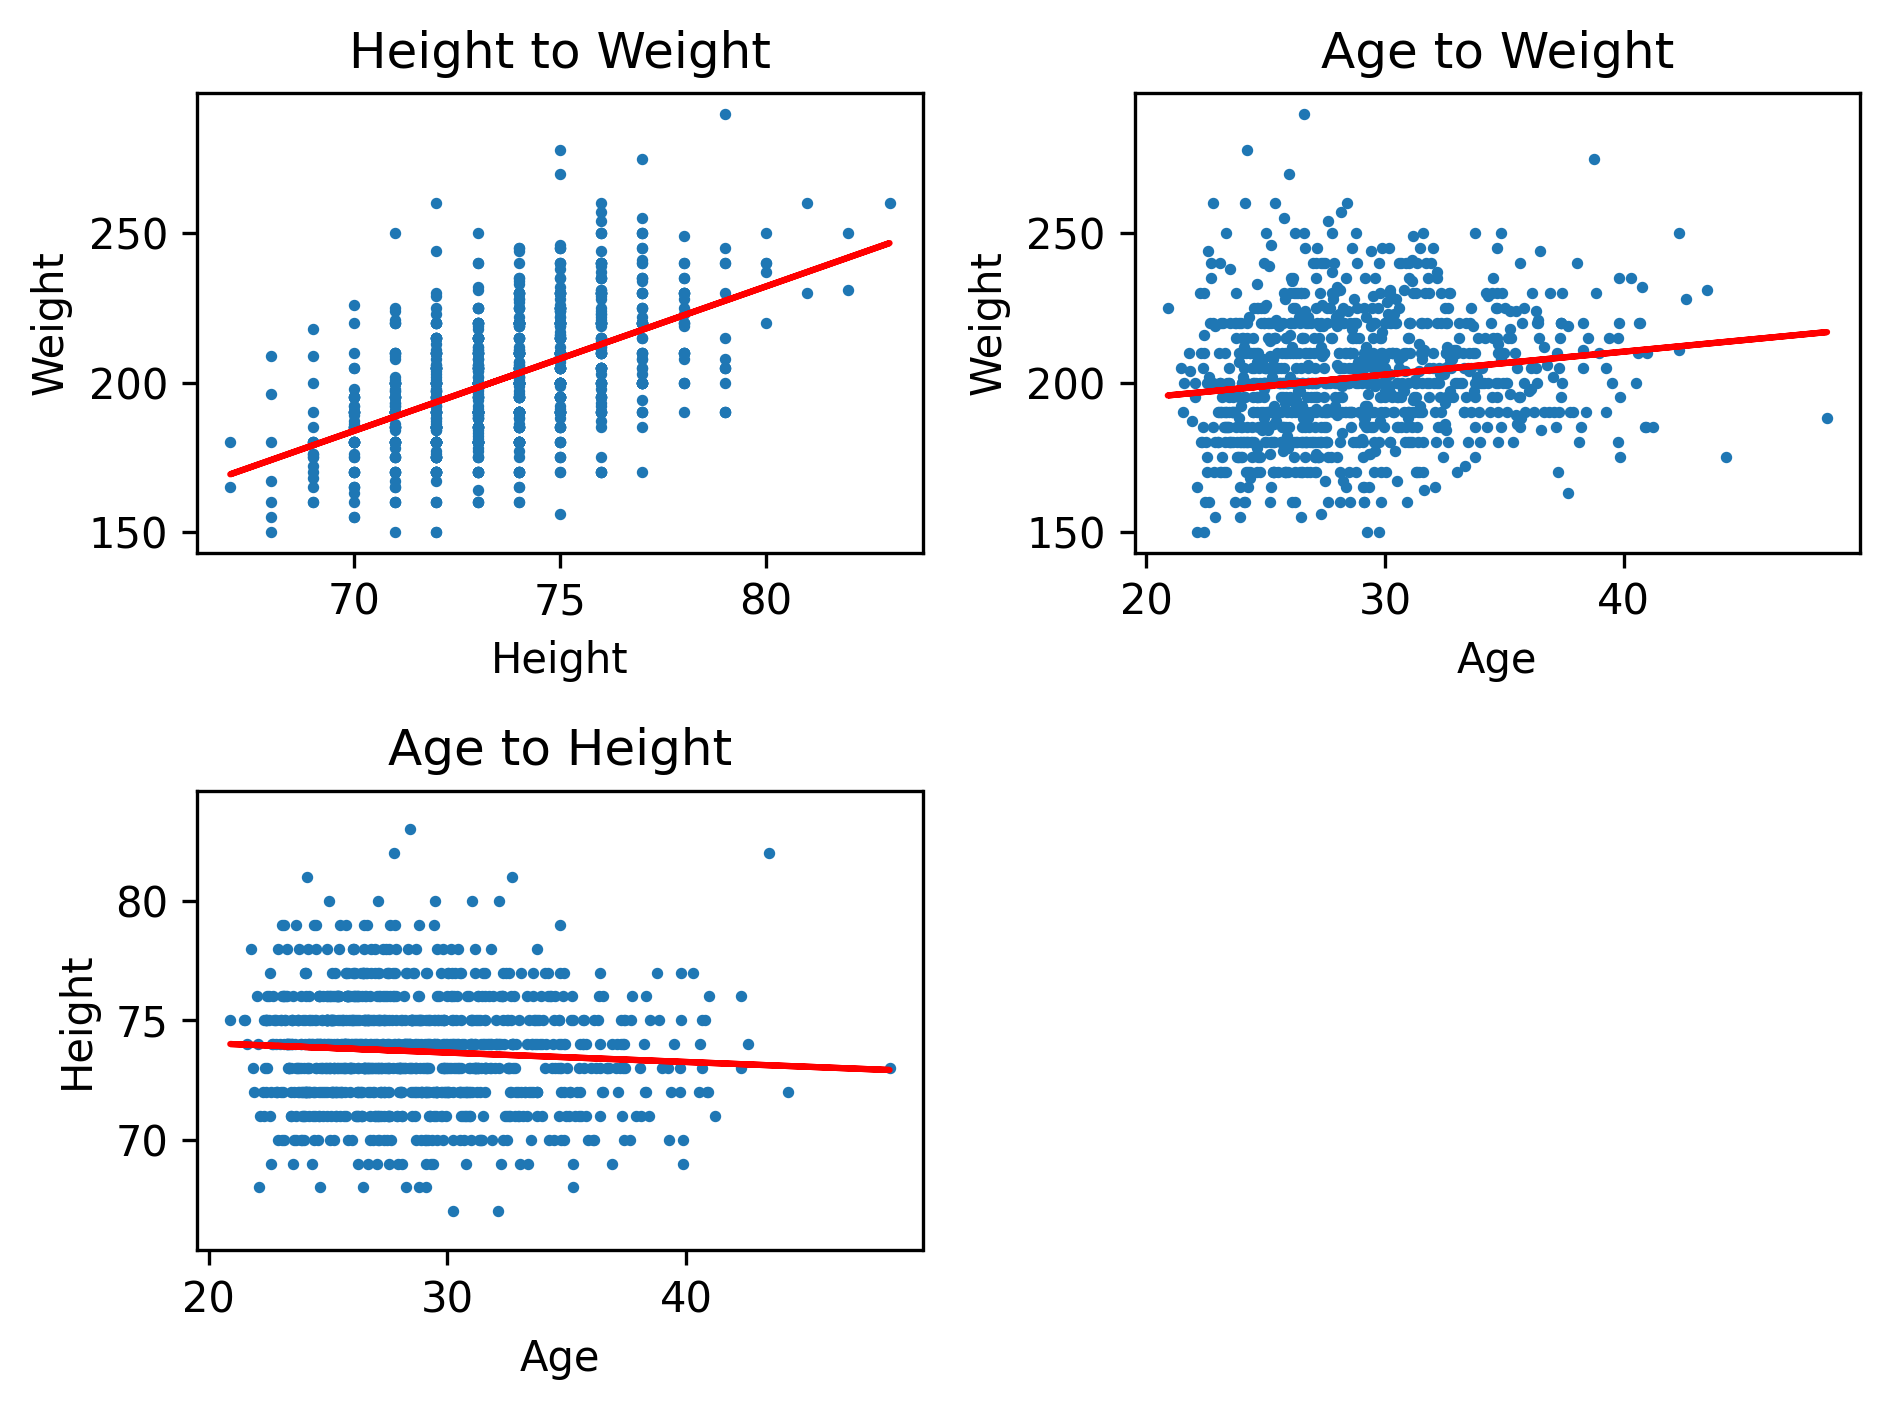

In [17]:
height, weight, age = np.load("MLB.npy").T
n = len(height)

# Plot height to weight
plt.subplot(221)
slope, intercept, r, p, se = linregress(height, weight)
plt.plot(height, slope * height + intercept, color="red")
plt.scatter(height, weight, s=3)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height to Weight")

# Plot Age to Weight
plt.subplot(222)
slope, intercept, r, p, se = linregress(age, weight)
plt.plot(age, slope * age + intercept, color="red")
plt.scatter(age, weight, s=3)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Age to Weight")

# Plot Age to Weight
plt.subplot(223)
slope, intercept, r, p, se = linregress(age, height)
plt.plot(age, slope * age + intercept, color="red")
plt.scatter(age, height, s=3)
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Age to Height")

plt.axis('equal')
plt.tight_layout()
plt.show()


### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with at least two better visualizations. Include line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

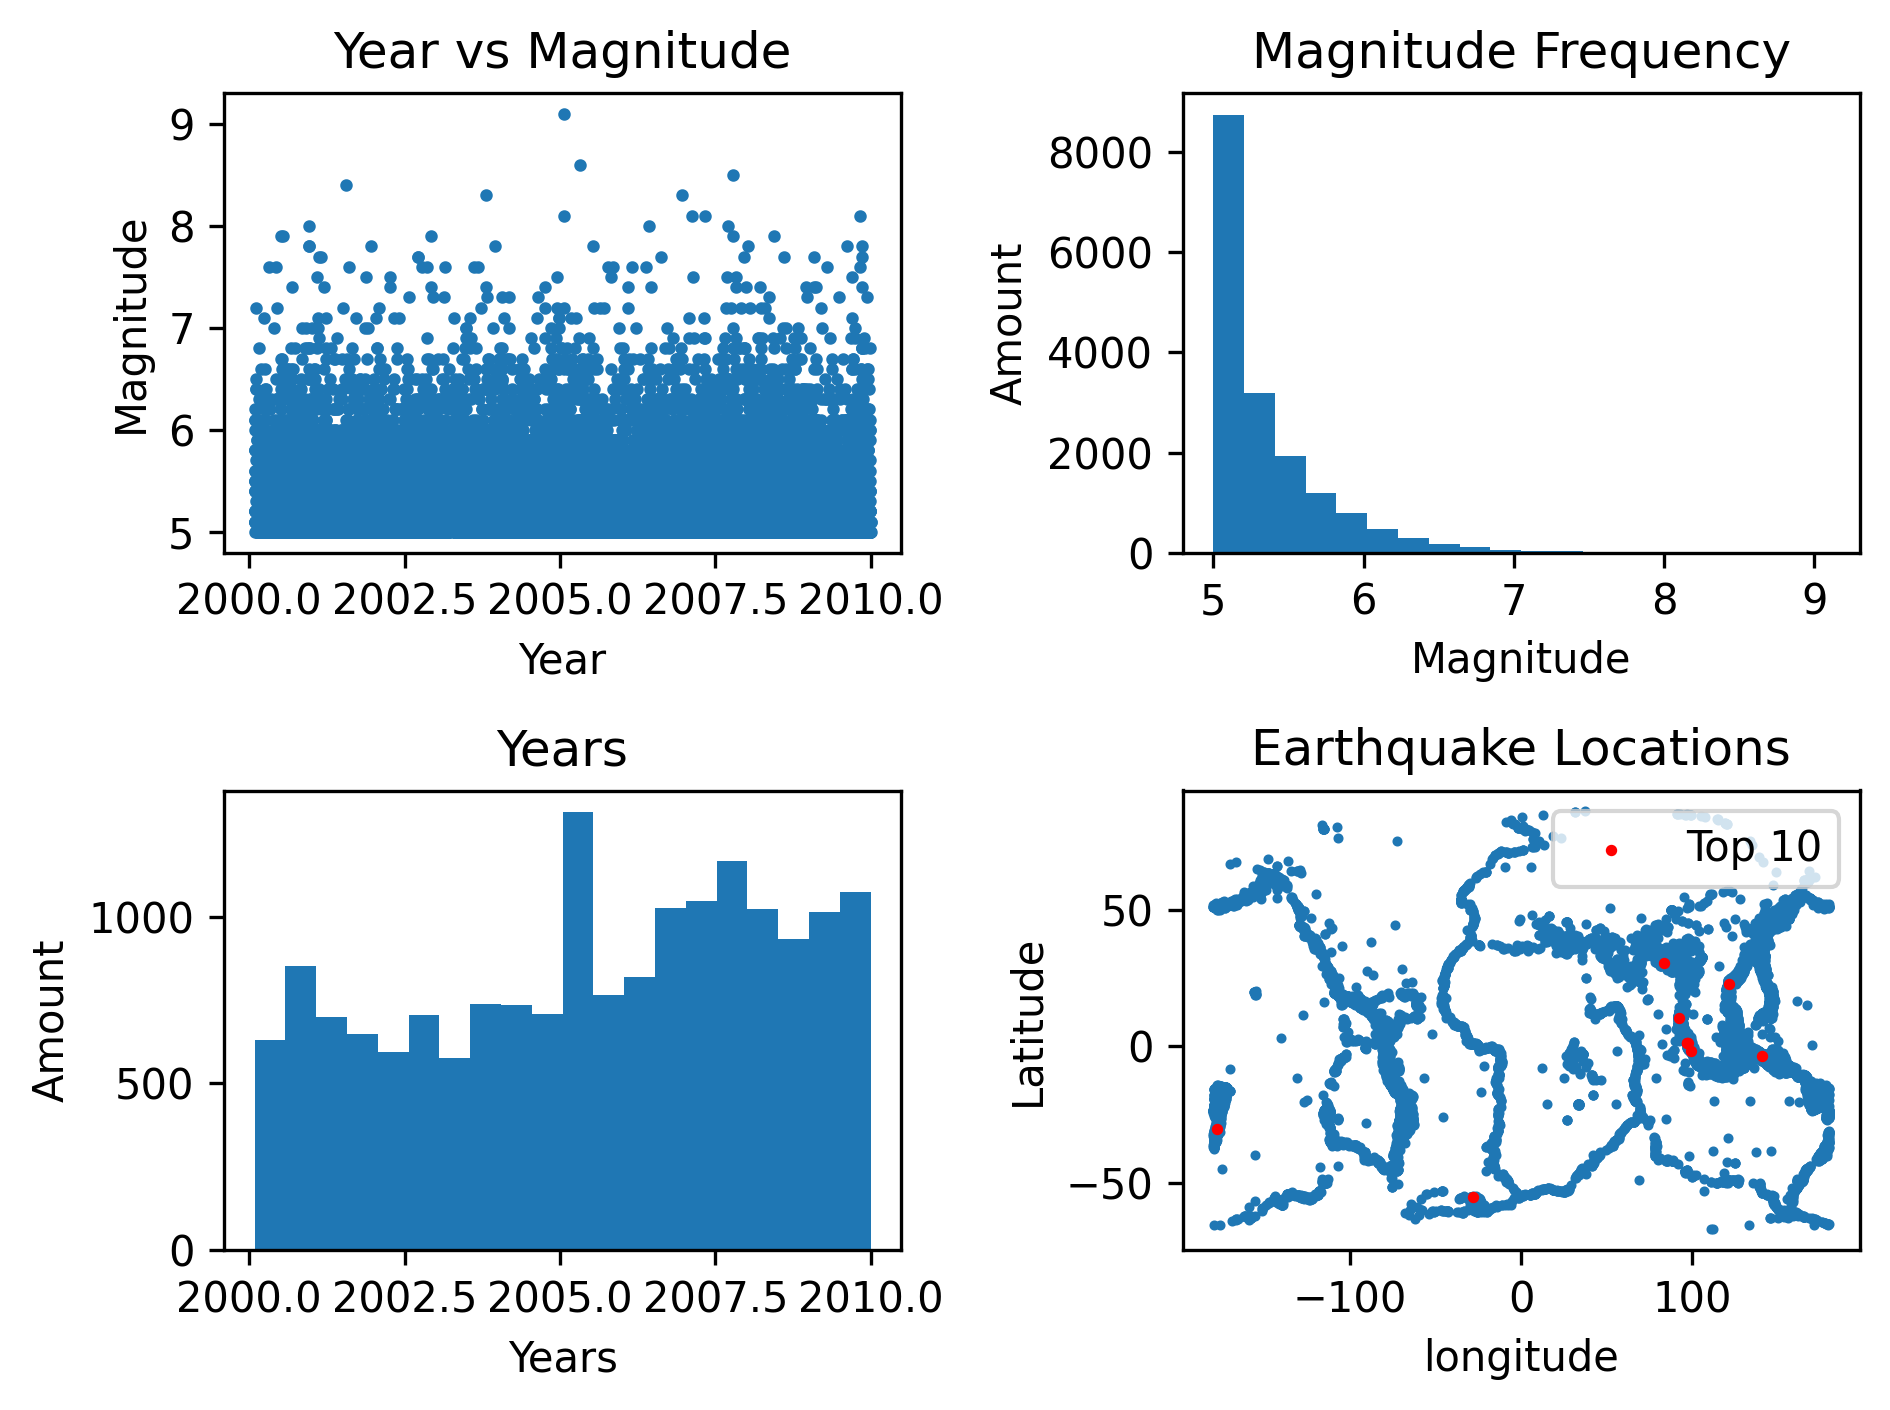

In [44]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T
# fig = plt.figure(figsize=(8, 8))

# Plot Year vs Magnitude to get how many earthquakes happened every year
plt.subplot(221)
plt.scatter(years, magnitudes, s=4)
plt.ylabel("Magnitude")
plt.xlabel("Year")
plt.title("Year vs Magnitude")

# Plot Magnitudes as a histogram to get stronger vs weaker
plt.subplot(222)
plt.hist(magnitudes, bins=20)
plt.ylabel("Amount")
plt.xlabel("Magnitude")
plt.title("Magnitude Frequency")

# Plot years in histogram to get when most happened
plt.subplot(223)
plt.hist(years, bins=20)
plt.ylabel("Amount")
plt.xlabel("Years")
plt.title("Years")

# Plot Latitude vs Longitude to get where earthquakes happened
# Then plot where the strongest happened
indices_of_strongest = np.argsort(magnitudes)[:10]
latitudes_of_strongest = latitude[indices_of_strongest]
longitudes_of_strongest = longitude[indices_of_strongest]
plt.subplot(224)
plt.scatter(longitude, latitude, s=2)
plt.scatter(longitudes_of_strongest, latitudes_of_strongest, s=3, color="red", label="Top 10")
plt.ylabel("Latitude")
plt.xlabel("longitude")
plt.title("Earthquake Locations")
plt.legend()

plt.tight_layout()
plt.show()


### Problem 5

The _Rosenbrock function_ is defined as $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Also plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

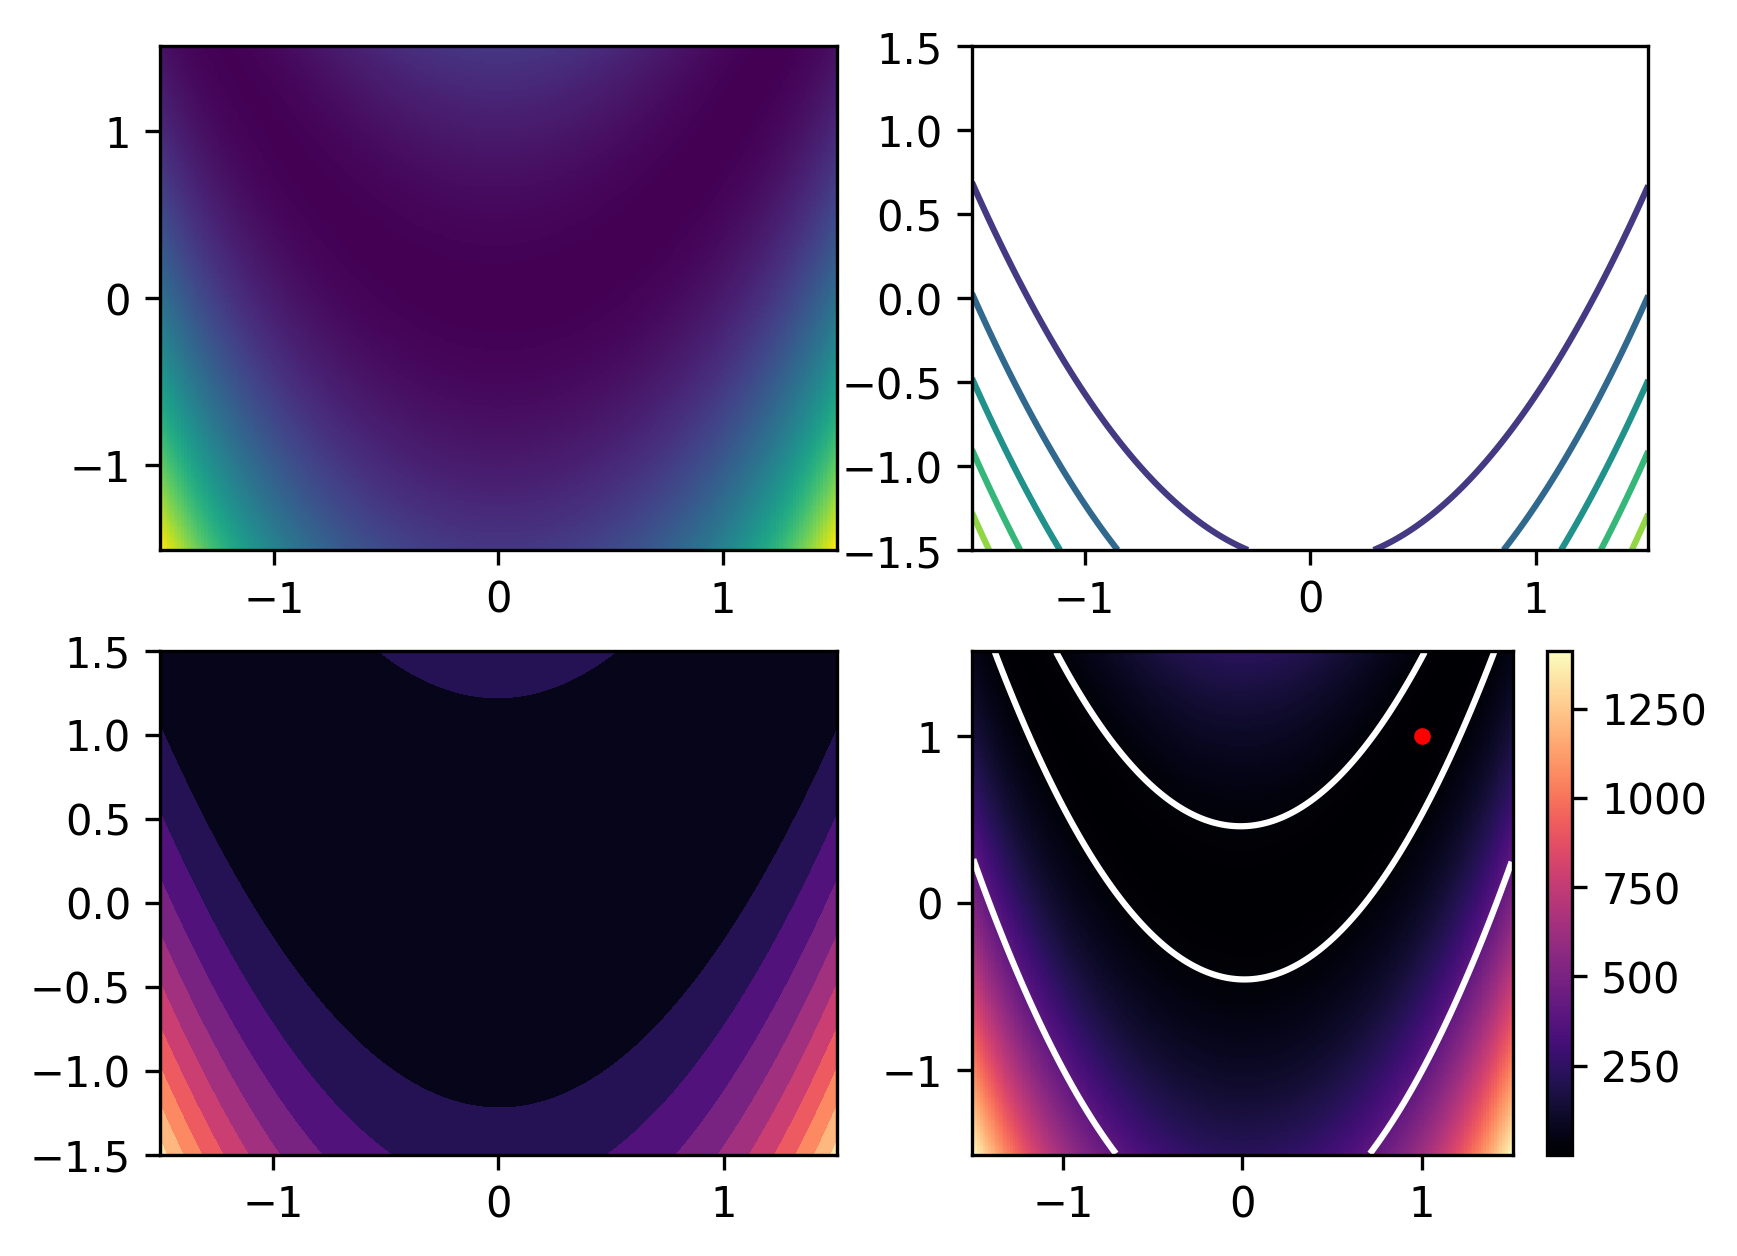

In [55]:
# Construct a 2-D domain with np.meshgrid() and calculate f on the domain.
x = np.linspace(-1.5, 1.5, 200)
X, Y = np.meshgrid(x, x)
Z = (1 - X)**2 + 100*(Y - X**2)**2

# Plot f using a heat map, a contour map, a filled contour map, and the minimizer
fig, ax = plt.subplots(2,2)
ax[0,0].pcolormesh(X, Y, Z, cmap="viridis")
ax[0,1].contour(X, Y, Z, 6, cmap="viridis")
ax[1,0].contourf(X, Y, Z, 12, cmap="magma")
ax[1,1].contour(X, Y, Z, [-400, -20, 0, 22, 402], colors="white")
ax[1,1].plot(1, 1, '.r')
cax = ax[1,1].pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(cax, ax=ax[1,1])
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Smaller countries can fluctuate in gdp per capita much more than larger countries
Taller heights of people are positively correlated with higher gdp per capita
Higher or lower populations doesn't give a strong indicator of higher or lower gdp per capita
Males tend to be taller than females and both seem to have bi-or-tri modal distributions


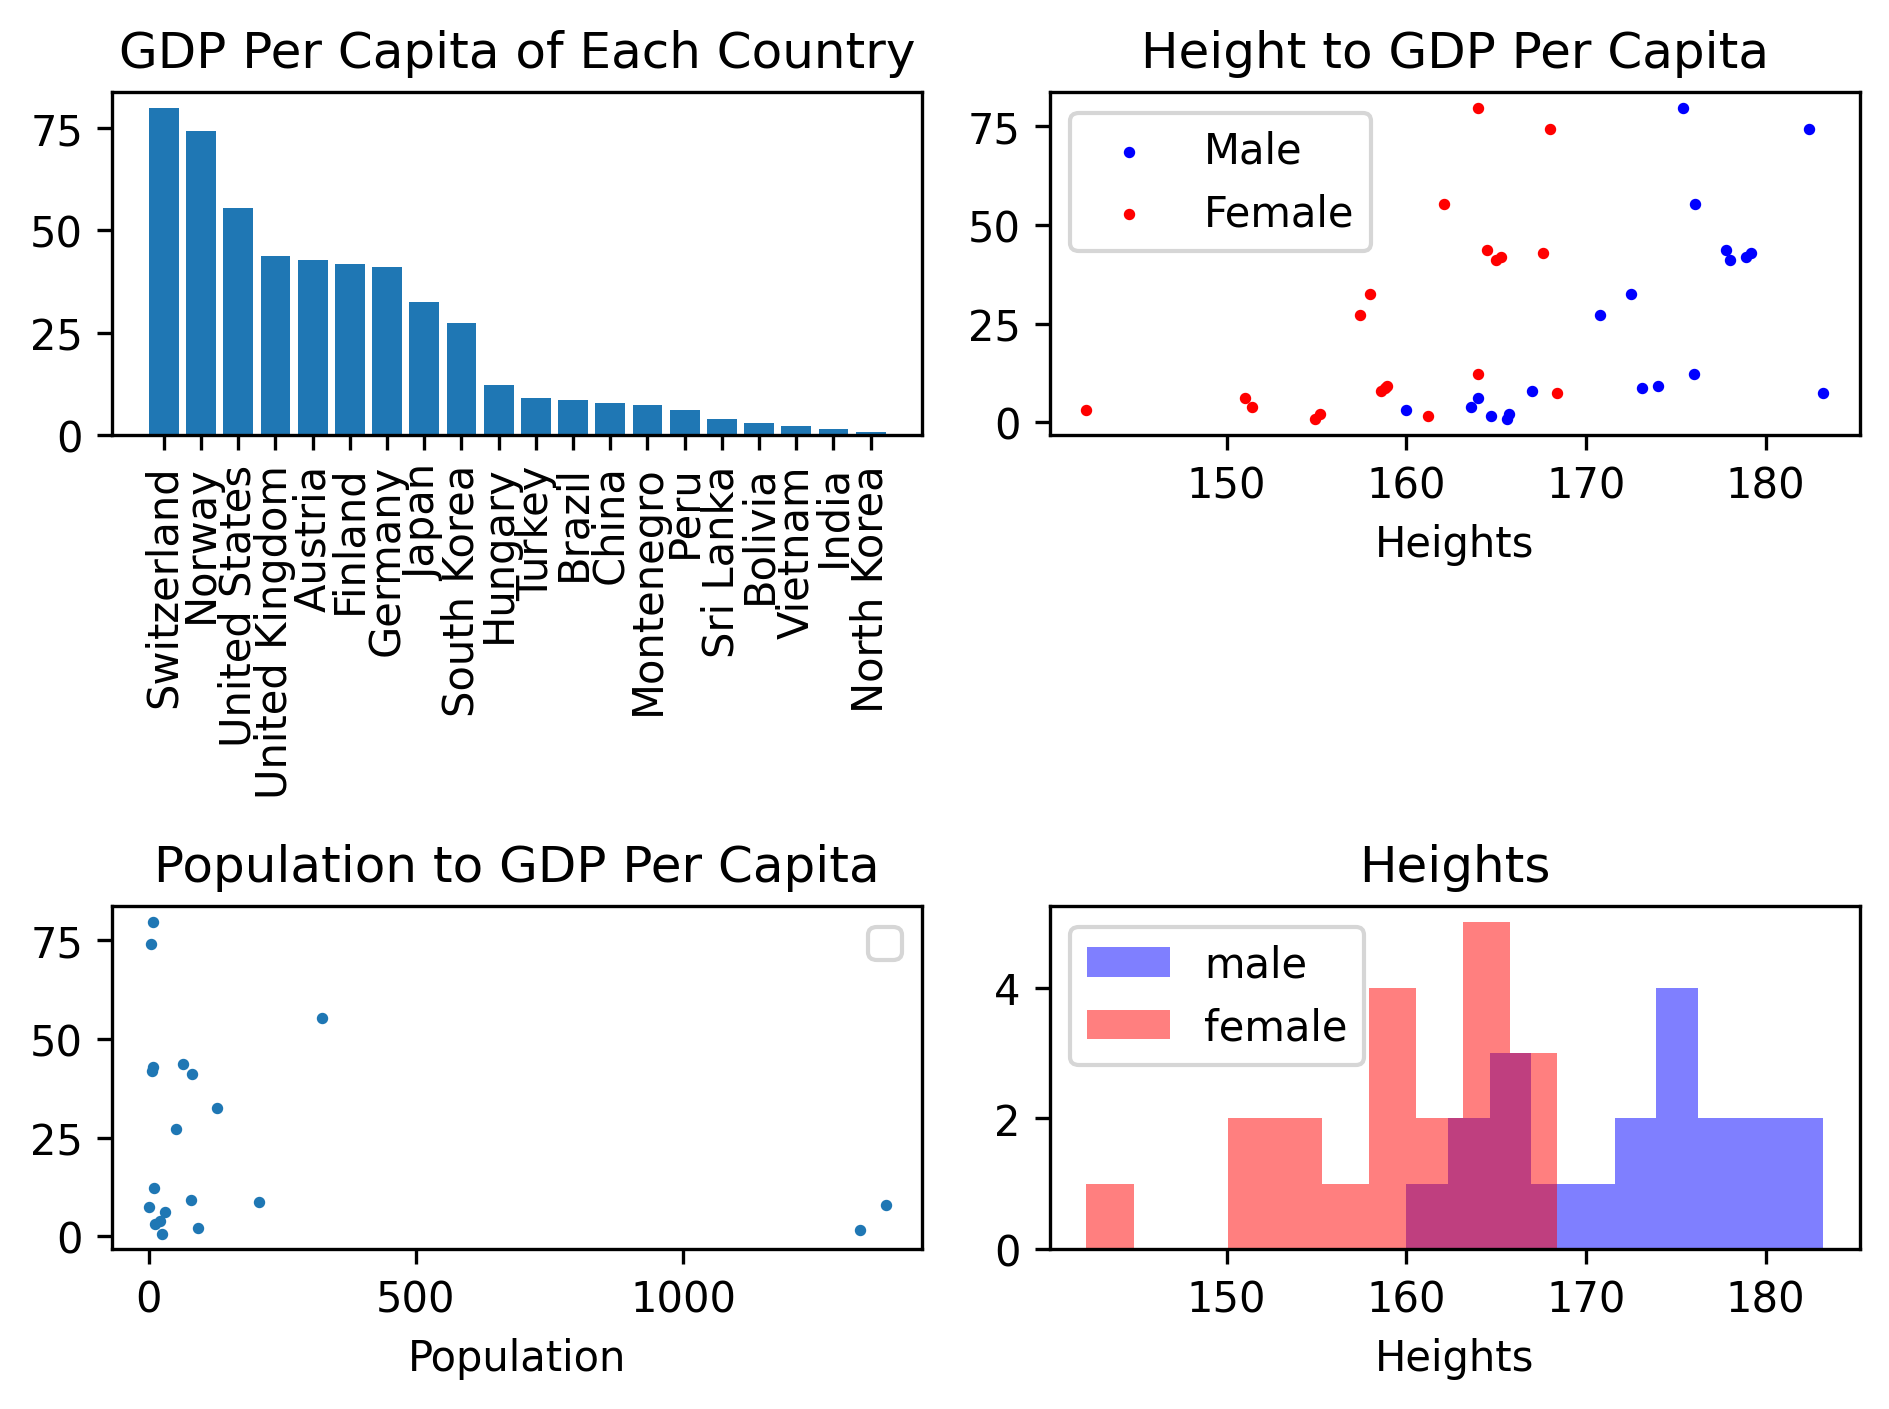

In [74]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

# Compute gdp_per_capita
gdp_per_capita = gdp / population
ordered_gdp = np.argsort(gdp_per_capita)[::-1]

# Plot the gdp per capita for each country
plt.subplot(221)
plt.bar(countries[ordered_gdp], gdp_per_capita[ordered_gdp], align="center")
plt.xticks(rotation=90)
plt.title("GDP Per Capita of Each Country")
print("Smaller countries can fluctuate in gdp per capita much more than larger countries")

# Plot the heights of people to GDP
plt.subplot(222)
plt.scatter(male, gdp_per_capita, color="blue", s=3, label="Male")
plt.scatter(female, gdp_per_capita, color="red", s=3, label="Female")
plt.xlabel("Heights")
plt.legend()
plt.title("Height to GDP Per Capita")
print("Taller heights of people are positively correlated with higher gdp per capita")

# Plot the population to gdp per capita
plt.subplot(223)
plt.scatter(population, gdp_per_capita, s=3)
plt.xlabel("Population")
plt.legend()
plt.title("Population to GDP Per Capita")
print("Higher or lower populations doesn't give a strong indicator of higher or lower gdp per capita")

# Plot the averages of heights
plt.subplot(224)
plt.hist(male, bins=10, alpha=0.5, color="blue", label="male")
plt.hist(female, bins=10, alpha=0.5, color="red", label="female")
plt.xlabel("Heights")
plt.legend()
plt.title("Heights")
print("Males tend to be taller than females and both seem to have bi-or-tri modal distributions")

plt.tight_layout()
plt.show()

